# ...in Mathematica

## Wikidata SPARQL endpoint in Mathematica

by Vishank Patel

See the [Wikidata Welcome Page](https://www.wikidata.org/wiki/Wikidata:Main_Page), [Wikidata Query Service/User Manual](https://www.mediawiki.org/wiki/Wikidata_Query_Service/User_Manual) and [Mathematica WikidataData](https://reference.wolfram.com/language/ref/WikidataData.html) documentation.

These recipe examples were tested on February 10, 2022.

## 1. Basic Wikidata request

Mathematica has a built-in function "WikidataData" to request information from WikiData's SPARQL endpoint. Arguments can be in the form of Mathematica entities or external identifiers, which are unique for every listed object.

### Mathematica Entities

Mathematica entities can be queried using Mathematica's free form input ("Ctrl" + " =" , then typing the name in normally). As we are in a jupyter notebook, we will need to use the Entity function:

In [ ]:
Entity["Planet", "Earth"]["Radius"]

3958.761 miles

### External identifiers

#### Wikidata

External identifiers from Wikidata can be selected using the WikidataSearch command.

In [ ]:
WikidataSearch["Earth"]

{ExternalIdentifier[WikidataID, Q2, 
 
>    <|Label -> Earth, Description -> third planet from the Sun in the Solar System|>], 
 
>   ExternalIdentifier[WikidataID, Q21152267, 
 
>    <|Label -> dirt, Description -> natural surface of the ground|>], 
 
>   ExternalIdentifier[WikidataID, Q83697636, 
 
>    <|Label -> Earth, Description -> 
 
>      planet Earth as depicted in the 1987–1996 Teenage Mutant Ninja Turtles animated\
 
>       television series|>], ExternalIdentifier[WikidataID, Q6501125, 
 
>    <|Label -> ground, Description -> 
 
>      reference point in an electrical circuit from which voltages are measure|>], 
 
>   ExternalIdentifier[WikidataID, Q83697695, 
 
>    <|Label -> Earth, Description -> 
 
>      planet Earth as depicted in the 2003–2009 Teenage Mutant Ninja Turtles animated\
 
>       television series|>], ExternalIdentifier[WikidataID, Q83698907, 
 
>    <|Label -> Earth, Description -> 
 
>      planet Earth as depicted in the Teenage Mutant Ninja Turtles Adventures and\
 
>       Mutanimals Comics|>], ExternalIdentifier[WikidataID, Q73634409, 
 
>    <|Label -> Earth, Description -> 
 
>      planet Earth as depicted in Teenage Mutant Ninja Turtles|>]}

As you can see, we get a list of outputs from Wikidata. To extract the first element, we use the shorthand notation for the part command:

In [ ]:
WikidataSearch["Earth"][[1]]

ExternalIdentifier[WikidataID, Q2, <|Label -> Earth, 
 
>    Description -> third planet from the Sun in the Solar System|>]

To extract information about the object, we query WikidataData using the identifier

In [ ]:
WikidataData[WikidataSearch["Earth"][[1]], "Radius"]

{6378.14 kilometers, 6371. kilometers, 6356.8 kilometers}

WikidataData's syntax is generally the following:

WikidataData[item, {property1, property2, ...}]

To check all the available properties for an entity, we can run the following command:

{ExternalIdentifier[WikidataID, P18, 
 
>    <|Label -> image, Description -> 
 
>      image of relevant illustration of the subject; if available, also use more\
 
>       specific properties (sample: coat of arms image, locator map, flag image,\
 
>       signature image, logo image, collage image)|>], 
 
>   ExternalIdentifier[WikidataID, P19, 
 
>    <|Label -> place of birth, Description -> 
 
>      most specific known (e.g. city instead of country, or hospital instead of city)\
 
>       birth location of a person, animal or fictional character|>], 
 
>   ExternalIdentifier[WikidataID, P21, 
 
>    <|Label -> sex or gender, Description -> 
 
>      sex or gender identity of human or animal. For human: male, female, non-binary,\
 
>       intersex, transgender female, transgender male, agender. For animal: male\
 
>       organism, female organism. Groups of same gender use subclass of (P279)|>], 
 
>   ExternalIdentifier[WikidataID, P27, 
 
>    <|Label -> country of citizenship, 
 
>     Description -> the object is a country that recognizes the subject as its citizen|>
 
>     ], ExternalIdentifier[WikidataID, P31, 
 
>    <|Label -> instance of, Description -> 
 
>      that class of which this subject is a particular example and member|>], 
 
>   ExternalIdentifier[WikidataID, P166, 
 
>    <|Label -> award received, Description -> 
 
>      award or recognition received by a person, organisation or creative work|>], 
 
>   ExternalIdentifier[WikidataID, P54, 
 
>    <|Label -> member of sports team, 
 
>     Description -> sports teams or clubs that the subject represents or represented|>]\
 
>    , ExternalIdentifier[WikidataID, P69, 
 
>    <|Label -> educated at, Description -> 
 
>      educational institution attended by subject|>], 
 
>   ExternalIdentifier[WikidataID, P106, 
 
>    <|Label -> occupation, Description -> 
 
>      occupation of a person; see also "field of work" (Property:P101), "position held"\
 
>       (Property:P39)|>], ExternalIdentifier[WikidataID, P213, 
 
>    <|Label -> ISNI, Description -> 
 
>      International Standard Name Identifier for an identity. Format: 4 blocks of 4\
 
>       digits separated by a space, first block is 0000|>], 
 
>   ExternalIdentifier[WikidataID, P214, 
 
>    <|Label -> VIAF ID, Description -> 
 
>      identifier for the Virtual International Authority File database [format: up to\
 
>       22 digits]|>], ExternalIdentifier[WikidataID, P569, 
 
>    <|Label -> date of birth, Description -> date on which the subject was born|>], 
 
>   ExternalIdentifier[WikidataID, P373, 
 
>    <|Label -> Commons category, Description -> 
 
>      name of the Wikimedia Commons category containing files related to this item\
 
>       (without the prefix "Category:")|>], 
 
>   ExternalIdentifier[WikidataID, P345, 
 
>    <|Label -> IMDb ID, Description -> 
 
>      identifier for the IMDb [with prefix 'tt', 'nm', 'co', 'ev', 'ch' or 'ni']|>], 
 
>   ExternalIdentifier[WikidataID, P244, 
 
>    <|Label -> Library of Congress authority ID, 
 
>     Description -> 
 
>      Library of Congress name authority (persons, families, corporate bodies, events,\
 
>       places, works and expressions) and subject authority identifier [Format: 1-2\
 
>       specific letters followed by 8-10 digits (see regex). For manifestations, use\
 
>       P1144]|>], ExternalIdentifier[WikidataID, P734, 
 
>    <|Label -> family name, Description -> part of full name of person|>], 
 
>   ExternalIdentifier[WikidataID, P735, 
 
>    <|Label -> given name, Description -> 
 
>      first name or another given name of this person; values used with the property\
 
>       should not link disambiguations nor family names.|>], 
 
>   ExternalIdentifier[WikidataID, P1050, 
 
>    <|Label -> medical condition, Description -> 
 
>      any state relevant to the health of an organism, including diseases and positive\
 
>       conditions|>], ExternalIdentifier[WikidataID, P7859, 
 
>    <|Label -> 
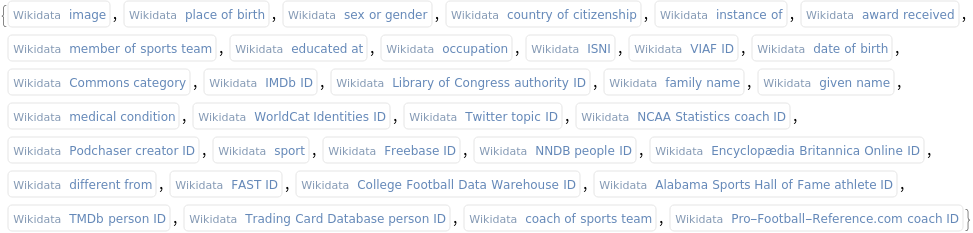

In [ ]:
WikidataData[WikidataSearch["Nick Saban"][[1]], "Properties"]

If the properties requested are more specialized, they can be inputted by searching for the property object on Wikidata. 

In [ ]:
WikidataData[
 WikidataSearch["Nick Saban"][[1]],
 WikidataSearch["Property" -> "Award received"][[1]]]

{ExternalIdentifier[WikidataID, Q20875134, 
 
>    <|Label -> member of the Alabama Academy of Honor, 
 
>     Description -> highest award of the state of Alabama|>]}

#### Other Identifiers

Wikidata can also accept input from other identifier systems such as ISBN, DOI, PubChemCompoundID and many more:

In [ ]:
WikidataData[
 ExternalIdentifier["PubChemCompoundID", "123591"],
 WikidataSearch["Property" -> "Chemical structure"][[1]]]

{URL[http://commons.wikimedia.org/wiki/Special:FilePath/Buckminsterfullerene-2D-skeletal\
 
>     .png]}

## 2. Example Use-cases

Entity classes behave like a collection of entities. Defining classes allows us to add constrains to our search and get specific useful data.

### Retrieving melting points of elements

In [ ]:
WikidataData[
    {Entity["Element","Aluminium"],Entity["Element","Lead"],Entity["Element","Tungsten"]},
    WikidataSearch["Property"->"melting point"][[1]],"Association"]

<|Entity[Element, Aluminium] -> {660. degrees Celsius,        3                   }, 
                                                       1.22 10  degrees Fahrenheit
 
>   Entity[Element, Lead] -> {328. degrees Celsius,       2                   }, 
                                                    6.2 10  degrees Fahrenheit
 
>   Entity[Element, Tungsten] -> {3410. degrees Celsius,        3                   }|>
                                                         6.17 10  degrees Fahrenheit

To be more specific, we can obtain the melting points of elements with density from 7 to 8 grams/cm^3

<|Entity[Element, Gadolinium] -> {}, 
 
>   Entity[Element, Iron] -> {1811. kelvins, 1538. degrees Celsius}, 
 
>   Entity[Element, Manganese] -> {       3                   }, 
                                   2.27 10  degrees Fahrenheit
 
>   Entity[Element, Samarium] -> {}, 
 
>   Entity[Element, Indium] -> {      2                   }, 
                                3.1 10  degrees Fahrenheit
 
>   Entity[Element, Tin] -> {231.9 degrees Celsius,       2                   }, 
                                                    4.5 10  degrees Fahrenheit
 
>   Entity[Element, Promethium] -> {}, 
 
>   Entity[Element, Chromium] -> {       3                   }, 
                                  3.45 10  degrees Fahrenheit
 
>   Entity[Element, Zinc] -> {419. degrees Celsius}, Entity[Element, Tennessine] -> {}, 
 
>   Entity[Element, Neodymium] -> {}|>
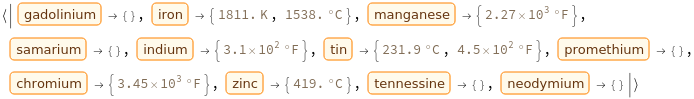

In [ ]:
WikidataData[
 EntityList[
  EntityClass[
   "Element", 
   {"Density" -> Quantity[Interval[{7, 8}], "Grams"/"Centimeters"^3]}]],
 WikidataSearch["Property" -> "melting point"][[1]], "Association"] 

NOTE : In Mathematica, the EntityClass above can be easily constructed using Mathematica's free-form input. For instance, typing "earliest discovered elements" in the orange box("Ctrl"+"=") gives the following output: 

Dataset[<|Entity[Element, Tennessine] -> 
 
>     {ExternalIdentifier[WikidataID, Q1144326, 
 
>       <|Label -> Yuri Oganessian, Description -> Russian nuclear physicist|>]}, 
 
>    Entity[Element, Oganesson] -> 
 
>     {ExternalIdentifier[WikidataID, Q259517, 
 
>       <|Label -> Joint Institute for Nuclear Research, 
 
>        Description -> Physics research institute in Russia|>]}, 
 
>    Entity[Element, Moscovium] -> 
 
>     {ExternalIdentifier[WikidataID, Q259517, 
 
>       <|Label -> Joint Institute for Nuclear Research, 
 
>        Description -> Physics research institute in Russia|>]}, 
 
>    Entity[Element, Nihonium] -> 
 
>     {ExternalIdentifier[WikidataID, Q259517, 
 
>       <|Label -> Joint Institute for Nuclear Research, 
 
>        Description -> Physics research institute in Russia|>]}, 
 
>    Entity[Element, Livermorium] -> 
 
>     {ExternalIdentifier[WikidataID, Q259517, 
 
>       <|Label -> Joint Institute for Nuclear Research, 
 
>        Description -> Physics research institute in Russia|>]}|>, 
 
>   TypeSystem`Assoc[TypeSystem`Atom[Entity[Element]], 
 
>    TypeSystem`Vector[TypeSystem`AnyType, 1], 5], <||>]
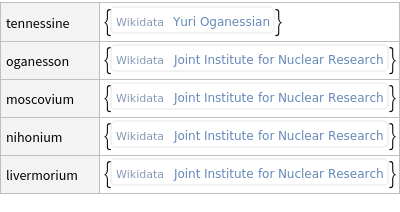

In [ ]:
WikidataData[
 EntityList[
  EntityClass[
   "Element", {EntityProperty["Element", "DiscoveryDate"] -> TakeLargest[5]}]],
 WikidataSearch["Property" -> "discoverer"][[1]], "Dataset"]

### Population distribution of Alabama counties 

<|Entity[AdministrativeDivision, {JeffersonCounty, Alabama, UnitedStates}] -> {659479.}, 
 
>   Entity[AdministrativeDivision, {MobileCounty, Alabama, UnitedStates}] -> {414079.}, 
 
>   Entity[AdministrativeDivision, {MadisonCounty, Alabama, UnitedStates}] -> {346892.}, 
 
>   Entity[AdministrativeDivision, {BaldwinCounty, Alabama, UnitedStates}] -> {231767.}, 
 
>   Entity[AdministrativeDivision, {MontgomeryCounty, Alabama, UnitedStates}] -> 
 
>    {226659.}, Entity[AdministrativeDivision, {ShelbyCounty, Alabama, UnitedStates}] -> 
 
>    {204180.}, Entity[AdministrativeDivision, 
 
>     {TuscaloosaCounty, Alabama, UnitedStates}] -> {200821.}, 
 
>   Entity[AdministrativeDivision, {LeeCounty, Alabama, UnitedStates}] -> {150933.}, 
 
>   Entity[AdministrativeDivision, {MorganCounty, Alabama, UnitedStates}] -> {119787.}, 
 
>   Entity[AdministrativeDivision, {CalhounCounty, Alabama, UnitedStates}] -> {116441.}, 
 
>   Entity[AdministrativeDivision, {EtowahCounty, Alabama, UnitedStates}] -> {103931.}, 
 
>   Entity[AdministrativeDivision, {HoustonCounty, Alabama, UnitedStates}] -> {103668.}, 
 
>   Entity[AdministrativeDivision, {MarshallCounty, Alabama, UnitedStates}] -> {94760.}, 
 
>   Entity[AdministrativeDivision, {LauderdaleCounty, Alabama, UnitedStates}] -> 
 
>    {92797.}, Entity[AdministrativeDivision, 
 
>     {LimestoneCounty, Alabama, UnitedStates}] -> {88845.}, 
 
>   Entity[AdministrativeDivision, {CullmanCounty, Alabama, UnitedStates}] -> {87866.}, 
 
>   Entity[AdministrativeDivision, {StClairCounty, Alabama, UnitedStates}] -> {86308.}, 
 
>   Entity[AdministrativeDivision, {TalladegaCounty, Alabama, UnitedStates}] -> 
 
>    {81096.}, Entity[AdministrativeDivision, {ElmoreCounty, Alabama, UnitedStates}] -> 
 
>    {80902.}, Entity[AdministrativeDivision, {DeKalbCounty, Alabama, UnitedStates}] -> 
 
>    {71013.}, Entity[AdministrativeDivision, {WalkerCounty, Alabama, UnitedStates}] -> 
 
>    {65998.}, Entity[AdministrativeDivision, {RussellCounty, Alabama, UnitedStates}] -> 
 
>    {59585.}, Entity[AdministrativeDivision, {BlountCounty, Alabama, UnitedStates}] -> 
 
>    {59134.}, Entity[AdministrativeDivision, {AutaugaCounty, Alabama, UnitedStates}] -> 
 
>    {58805.}, Entity[AdministrativeDivision, {ColbertCounty, Alabama, UnitedStates}] -> 
 
>    {57227.}, Entity[AdministrativeDivision, {CoffeeCounty, Alabama, UnitedStates}] -> 
 
>    {53465.}, Entity[AdministrativeDivision, {JacksonCounty, Alabama, UnitedStates}] -> 
 
>    {52951.}, Entity[AdministrativeDivision, {DaleCounty, Alabama, UnitedStates}] -> 
 
>    {49326.}, Entity[AdministrativeDivision, {ChiltonCounty, Alabama, UnitedStates}] -> 
 
>    {45014.}, Entity[AdministrativeDivision, 
 
>     {TallapoosaCounty, Alabama, UnitedStates}] -> {41203.}, 
 
>   Entity[AdministrativeDivision, {DallasCounty, Alabama, UnitedStates}] -> {38462.}, 
 
>   Entity[AdministrativeDivision, {EscambiaCounty, Alabama, UnitedStates}] -> {37983.}, 
 
>   Entity[AdministrativeDivision, {CovingtonCounty, Alabama, UnitedStates}] -> 
 
>    {37570.}, Entity[AdministrativeDivision, 
 
>     {ChambersCounty, Alabama, UnitedStates}] -> {34772.}, 
 
>   Entity[AdministrativeDivision, {LawrenceCounty, Alabama, UnitedStates}] -> {33587.}, 
 
>   Entity[AdministrativeDivision, {PikeCounty, Alabama, UnitedStates}] -> {33339.}, 
 
>   Entity[AdministrativeDivision, {FranklinCounty, Alabama, UnitedStates}] -> {31532.}, 
 
>   Entity[AdministrativeDivision, {MarionCounty, Alabama, UnitedStates}] -> {30334.}, 
 
>   Entity[AdministrativeDivision, {GenevaCounty, Alabama, UnitedStates}] -> {26727.}, 
 
>   Entity[AdministrativeDivision, {BarbourCounty, Alabama, UnitedStates}] -> {25223.}, 
 
>   Entity[AdministrativeDivision, {CherokeeCounty, Alabama, UnitedStates}] -> {24971.}, 
 
>   Entity[AdministrativeDivision, {WinstonCounty, Alabama, UnitedStates}] -> {24146.}, 
 
>   Entity[AdministrativeDivision, {ClarkeCounty, Alabama, UnitedStates}] -> {23087.}, 
 
>   Entity[Administrat
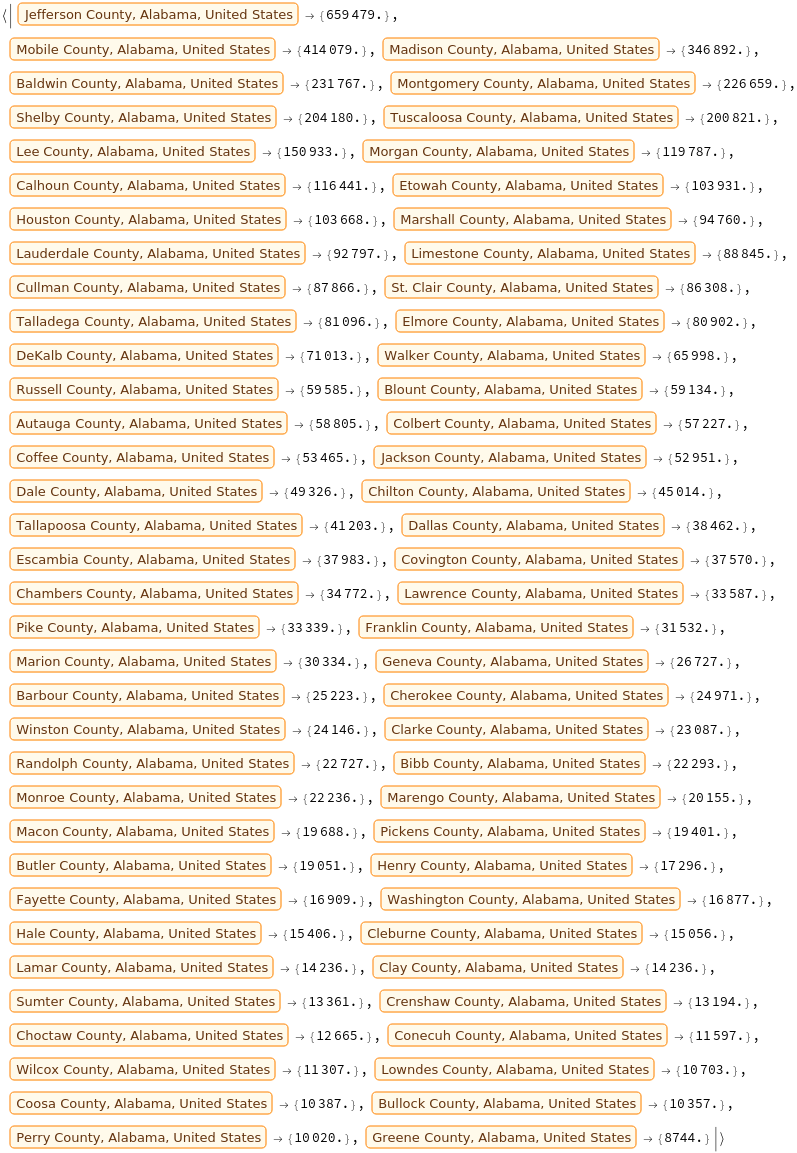

In [ ]:
populationData =
  WikidataData[
   EntityList[
    Entity["AdministrativeDivision", {"Alabama", "UnitedStates"}]["Subdivisions"]],
   WikidataSearch["Property" -> "population"][[1]], 
   "Association"];

ReverseSortBy[populationData, N] // Shallow

### Publication dates of books written by Newton

Dataset[<|ExternalIdentifier[WikidataID, Q5244955, 
 
>      <|Label -> De motu corporum in gyrum, Description -> tract by Newton|>] -> {}, 
 
>    ExternalIdentifier[WikidataID, Q5532171, 
 
>      <|Label -> General Scholium, Description -> essay written by Isaac Newton|>] -> {}
 
>     , ExternalIdentifier[WikidataID, Q15056312, 
 
>      <|Label -> Notes on the Jewish Temple, 
 
>       Description -> manuscript by Isaac Newton|>] -> {}, 
 
>    ExternalIdentifier[WikidataID, Q74263, 
 
>      <|Label -> 
 
>        Opticks, or a Treatise of the Reflections, Refractions, Inflections and Colours\
 
>         of Light, Description -> work by Isaac Newton|>] -> 
 
>     {DateObject[{1704}, Year, Gregorian, 0.]}, 
 
>    ExternalIdentifier[WikidataID, Q205921, 
 
>      <|Label -> Philosophiae Naturalis Principia Mathematica, 
 
>       Description -> tract by Isaac Newton|>] -> {DateObject[{1688}, Year, Julian, 0.]}
 
>     , ExternalIdentifier[WikidataID, Q2596150, 
 
>      <|Label -> Arithmetica Universalis, Description -> book by Isaac Newton|>] -> 
 
>     {DateObject[{1707}, Year, Gregorian, 0.]}, 
 
>    ExternalIdentifier[WikidataID, Q3074567, 
 
>      <|Label -> Method of Fluxions, Description -> book by Isaac Newton|>] -> 
 
>     {DateObject[{1736}, Year, Gregorian, 0.]}, 
 
>    ExternalIdentifier[WikidataID, Q7722834, 
 
>      <|Label -> The Chronology of Ancient Kingdoms, 
 
>       Description -> book by Isaac Newton|>] -> 
 
>     {DateObject[{1728}, Year, Gregorian, 0.]}, 
 
>    ExternalIdentifier[WikidataID, Q55870041, 
 
>      <|Label -> 
 
>        A Letter of Mr. Isaac Newton, Professor of the Mathematicks in the University\
 
>         of Cambridge; Containing His New Theory about Light and Colors: Sent by the\
 
>         Author to the Publisher from Cambridge, Febr. 6. 1671/72; In Order to be\
 
>         Communicated to the R.|>] -> {DateObject[{1671, 1, 1}, Day, Gregorian, 0.]}|>, 
 
>   TypeSystem`Assoc[TypeSystem`AnyType, 
 
>    TypeSystem`Vector[TypeSystem`Atom[DateObject], TypeSystem`AnyLength], 9], <||>]
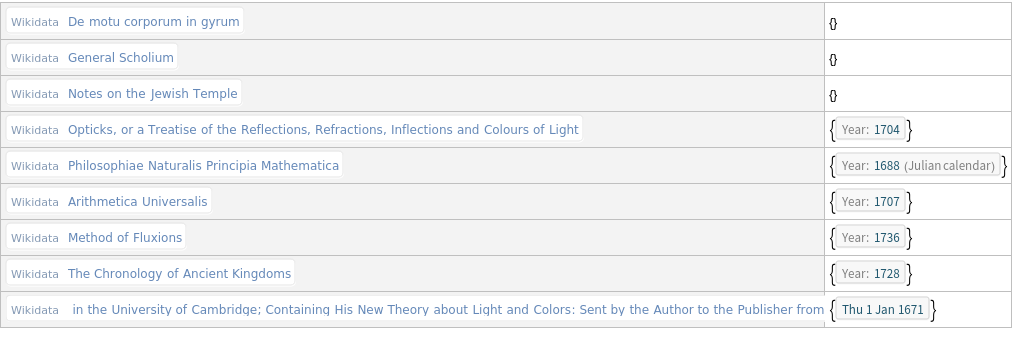

In [ ]:
WikidataData[
 EntityClass[
  WikidataSearch["Written work"][[1]], 
  {WikidataSearch["Property" -> "Author"][[1]] -> Entity["Person", "IsaacNewton"]}],
 WikidataSearch["Property" -> "publication date"][[1]], 
 "Dataset"]

### SI unit symbols and their measured physical quantities

Dataset[<|ExternalIdentifier[WikidataID, Q83216, 
 
>      <|Label -> candela, Description -> SI unit of luminous intensity|>] -> 
 
>     <|ExternalIdentifier[WikidataID, P5061, 
 
>        <|Label -> unit symbol, Description -> 
 
>          abbreviation of a unit for each language; if not provided, then it should\
 
>           default to English|>] -> {cd}, 
 
>      ExternalIdentifier[WikidataID, P111, 
 
>        <|Label -> measured physical quantity, 
 
>         Description -> 
 
>          value of a physical property expressed as number multiplied by a unit|>] -> 
 
>       {ExternalIdentifier[WikidataID, Q104831, 
 
>         <|Label -> luminous intensity, 
 
>          Description -> luminous flux per solid angle in a given direction|>], 
 
>        ExternalIdentifier[WikidataID, Q107164637, 
 
>         <|Label -> conventional retinal illuminance|>], 
 
>        ExternalIdentifier[WikidataID, Q107165192, 
 
>         <|Label -> natural pupil luminance|>]}|>, 
 
>    ExternalIdentifier[WikidataID, Q11570, 
 
>      <|Label -> kilogram, Description -> SI unit of mass|>] -> 
 
>     <|ExternalIdentifier[WikidataID, P5061, 
 
>        <|Label -> unit symbol, Description -> 
 
>          abbreviation of a unit for each language; if not provided, then it should\
 
>           default to English|>] -> {kg}, 
 
>      ExternalIdentifier[WikidataID, P111, 
 
>        <|Label -> measured physical quantity, 
 
>         Description -> 
 
>          value of a physical property expressed as number multiplied by a unit|>] -> 
 
>       {ExternalIdentifier[WikidataID, Q11423, 
 
>         <|Label -> mass, Description -> 
 
>           property of matter to resist changes of the state of motion and to attract\
 
>            other bodies|>]}|>, ExternalIdentifier[WikidataID, Q11574, 
 
>      <|Label -> second, Description -> 
 
>        SI unit of time, defined as 9 192 631 770 periods of the ground-state hyperfine\
 
>         transitions of caesium-133|>] -> 
 
>     <|ExternalIdentifier[WikidataID, P5061, 
 
>        <|Label -> unit symbol, Description -> 
 
>          abbreviation of a unit for each language; if not provided, then it should\
 
>           default to English|>] -> {s}, 
 
>      ExternalIdentifier[WikidataID, P111, 
 
>        <|Label -> measured physical quantity, 
 
>         Description -> 
 
>          value of a physical property expressed as number multiplied by a unit|>] -> 
 
>       {ExternalIdentifier[WikidataID, Q100828354, 
 
>         <|Label -> specific impulse by weight, 
 
>          Description -> representation of specific impulse|>], 
 
>        ExternalIdentifier[WikidataID, Q2199864, 
 
>         <|Label -> duration, Description -> 
 
>           length of time of an event or process; quality of an event or process with\
 
>            beginning and end|>]}|>, 
 
>    ExternalIdentifier[WikidataID, Q11573, 
 
>      <|Label -> metre, Description -> SI unit of length|>] -> 
 
>     <|ExternalIdentifier[WikidataID, P5061, 
 
>        <|Label -> unit symbol, Description -> 
 
>          abbreviation of a unit for each language; if not provided, then it should\
 
>           default to English|>] -> {m}, 
 
>      ExternalIdentifier[WikidataID, P111, 
 
>        <|Label -> measured physical quantity, 
 
>         Description -> 
 
>          value of a physical property expressed as number multiplied by a unit|>] -> 
 
>       {ExternalIdentifier[WikidataID, Q3153623, 
 
>         <|Label -> proper length, 
 
>          Description -> length of an object in the object's rest frame|>], 
 
>        ExternalIdentifier[WikidataID, Q98876254, 
 
>         <|Label -> diffusion coefficient for fluence rate, 
 
>          Description -> 
 
>           proportionality constant between the particle current density and the\
 
>            gradient of the particle fluence rate|>], 
 
>        ExternalIdentifier[WikidataID, Q36253, 
 
>         <|Label -> length, Description -> 
 
>           measured di
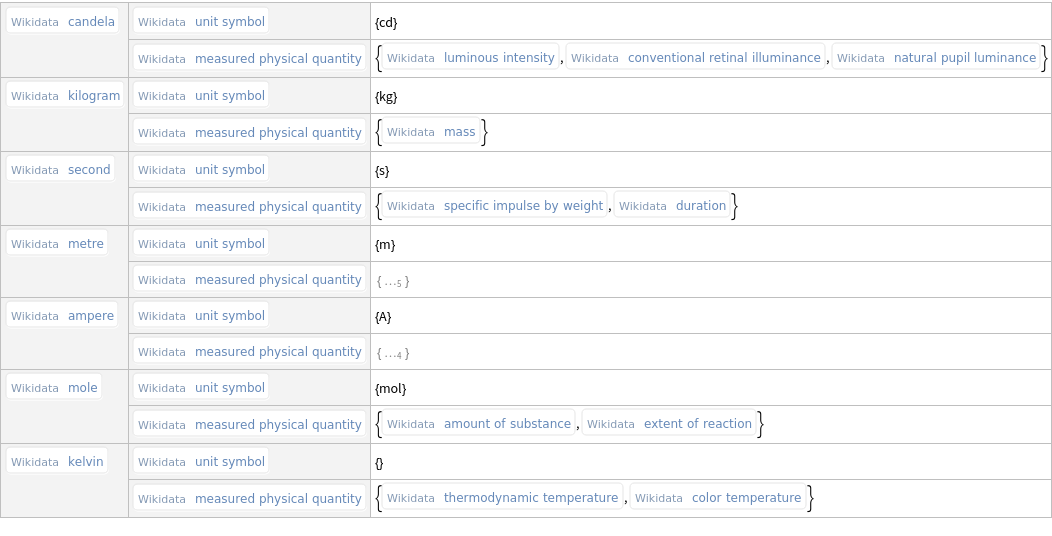

In [ ]:
WikidataData[
 EntityClass[WikidataSearch["SI base Unit"][[1]], {}],
 {WikidataSearch["Property" -> "unit symbol"][[1]],
  WikidataSearch["Property" -> "Measured physical quantity"][[1]]},
  "Dataset"]

## 3. SPARQL Query Syntax in Mathematica

Importing the necessary packages:

In [ ]:
Needs["GraphStore`"]

It is better to write the queries in the WikiData Query Service (WDQS) at https://query.wikidata.org/ given the autocompletion functionality.

WikiData SPARQL tutorial: https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial (It is amazing!)

Once the query is written, we can run it in Mathematica as follows:

### US Renewable Energy Farms 

In [ ]:
endpoint = "https://query.wikidata.org/sparql";
WindQuery = "SELECT ?powerplant ?pos ?powerplantLabel
WHERE
{
  ?powerplant wdt:P17 wd:Q30;
              wdt:P31 wd:Q194356;
              wdt:P625 ?pos;
  SERVICE wikibase:label { bd:serviceParam wikibase:language \"[AUTO_LANGUAGE],en \". }
}";

{<|powerplant -> URL[http://www.wikidata.org/entity/Q7494717], 
 
>    pos -> Point[GeoPosition[{30.811, -102.362}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7496747], 
 
>    pos -> Point[GeoPosition[{38.1167, -121.842}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7546149], 
 
>    pos -> Point[GeoPosition[{38.9722, -98.1502}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7559918], 
 
>    pos -> Point[GeoPosition[{39.9833, -79.0095}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7580746], 
 
>    pos -> Point[GeoPosition[{39.0949, -114.49}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7603945], 
 
>    pos -> Point[GeoPosition[{46.0372, -118.807}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7620376], 
 
>    pos -> Point[GeoPosition[{42.0606, -93.2706}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7622744], 
 
>    pos -> Point[GeoPosition[{40.9556, -88.4817}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7687863], 
 
>    pos -> Point[GeoPosition[{45.9392, -99.0108}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7809783], 
 
>    pos -> Point[GeoPosition[{44.5161, -99.2017}]]|>, <<109>>}
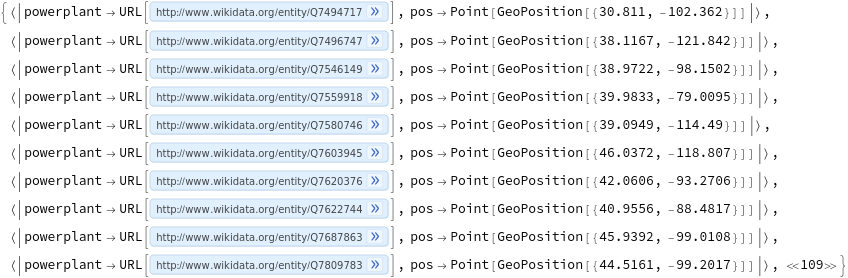

In [ ]:
WindFarmData = SPARQLExecute[endpoint, WindQuery];
WindFarmData //Shallow

GeoGraphics[-Graphics-, GeoBackground -> GeoStyling[StreetMapNoLabels], 
 
>   GeoCenter -> GeoPosition[{33.9045, -114.253}], GeoGridLines -> None, 
 
>   GeoGridLinesStyle -> GrayLevel[0.4, 0.3], 
 
>   GeoGridRange -> {{-0.790232, 0.790232}, {-0.347946, 0.479128}}, 
 
>   GeoGridRangePadding -> None, GeoModel -> ITRF00, 
 
>   GeoProjection -> {LambertAzimuthal, Centering -> GeoPosition[{33.9045, -114.253}]}, 
 
>   GeoRange -> {{13.8667, 53.9423}, {-162.344, -66.1625}}, GeoRangePadding -> Full, 
 
>   GeoResolution -> Automatic, GeoServer -> {Automatic}, GeoZoomLevel -> 3, 
 
>   MetaInformation -> 
 
>    {GeoModel -> ITRF00, LonLatBox -> {{-185.456, -43.0504}, {5.12862, 61.6261}}, 
 
>     PlotRange -> {{-0.790232, 0.790232}, {-0.347946, 0.479128}}, 
 
>     Projection -> 
 
>      {LambertAzimuthal, Centering -> GeoPosition[{33.9045, -114.253}], 
 
>       LongitudeDetermination -> -114.253}, 
 
>     Software -> Created with the Wolfram Language: www.wolfram.com, 
 
>     TileSources -> 
 
>      Wolfram Knowledgebase with data from © OpenStreetMap contributors:\
 
>       http://www.openstreetmap.org/copyright, GeoModel -> ITRF00, 
 
>     LonLatBox -> {{-185.456, -43.0504}, {5.12862, 61.6261}}, 
 
>     PlotRange -> {{-0.790232, 0.790232}, {-0.347946, 0.479128}}, 
 
>     Projection -> 
 
>      {LambertAzimuthal, Centering -> GeoPosition[{33.9045, -114.253}], 
 
>       LongitudeDetermination -> -114.253}, 
 
>     Software -> Created with the Wolfram Language: www.wolfram.com, 
 
>     TileSources -> 
 
>      Wolfram Knowledgebase with data from © OpenStreetMap contributors:\
 
>       http://www.openstreetmap.org/copyright, GeoModel -> ITRF00, 
 
>     LonLatBox -> {{-185.456, -43.0504}, {5.12862, 61.6261}}, 
 
>     PlotRange -> {{-0.790232, 0.790232}, {-0.347946, 0.479128}}, 
 
>     Projection -> 
 
>      {LambertAzimuthal, Centering -> GeoPosition[{33.9045, -114.253}], 
 
>       LongitudeDetermination -> -114.253}, 
 
>     Software -> Created with the Wolfram Language: www.wolfram.com, 
 
>     TileSources -> 
 
>      Wolfram Knowledgebase with data from © OpenStreetMap contributors:\
 
>       http://www.openstreetmap.org/copyright}]
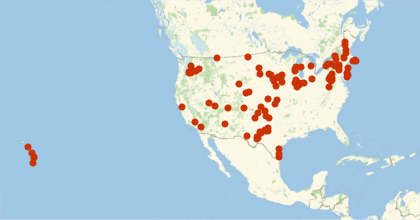

In [ ]:
GeoListPlot["pos" /. WindFarmData]

In [ ]:
SolarQuery = "SELECT ?powerplant ?pos ?powerplantLabel
WHERE
{
  ?powerplant wdt:P17 wd:Q30;
              wdt:P31 wd:Q1003207;
              wdt:P625 ?pos;
  SERVICE wikibase:label { bd:serviceParam wikibase:language \"[AUTO_LANGUAGE],en\". }
}";

{<|powerplant -> URL[http://www.wikidata.org/entity/Q7131446], 
 
>    pos -> Point[GeoPosition[{36.62, -120.87}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7179819], 
 
>    pos -> Point[GeoPosition[{30.4344, -97.4589}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7193891], 
 
>    pos -> Point[GeoPosition[{39.6138, -75.3087}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7414775], 
 
>    pos -> Point[GeoPosition[{37.6917, -105.917}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7516402], 
 
>    pos -> Point[GeoPosition[{35.6167, -115.333}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7516404], 
 
>    pos -> Point[GeoPosition[{35.6333, -115.35}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7572303], 
 
>    pos -> Point[GeoPosition[{28.4853, -80.6814}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7617318], 
 
>    pos -> Point[GeoPosition[{39.544, -118.561}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7808531], 
 
>    pos -> Point[GeoPosition[{40.2485, -74.1011}]]|>, 
 
>   <|powerplant -> URL[http://www.wikidata.org/entity/Q7978704], 
 
>    pos -> Point[GeoPosition[{30.25, -97.5167}]]|>, <<49>>}
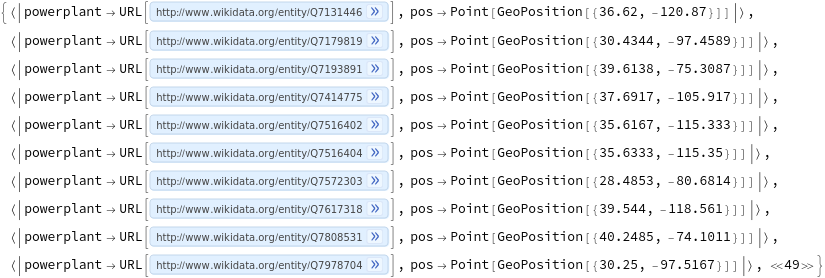

In [ ]:
SolarFarmData = SPARQLExecute[endpoint, SolarQuery];
SolarFarmData // Shallow

GeoGraphics[-Graphics-, GeoBackground -> GeoStyling[StreetMapNoLabels], 
 
>   GeoCenter -> GeoPosition[{36.3432, -96.8926}], GeoGridLines -> None, 
 
>   GeoGridLinesStyle -> GrayLevel[0.4, 0.3], 
 
>   GeoGridRange -> {{-0.446245, 0.446245}, {-0.20665, 0.258945}}, 
 
>   GeoGridRangePadding -> None, GeoModel -> ITRF00, 
 
>   GeoProjection -> {LambertAzimuthal, Centering -> GeoPosition[{36.3432, -96.8926}]}, 
 
>   GeoRange -> {{24.4819, 48.2046}, {-125.36, -68.4254}}, GeoRangePadding -> Full, 
 
>   GeoResolution -> Automatic, GeoServer -> {Automatic}, GeoZoomLevel -> 4, 
 
>   MetaInformation -> 
 
>    {GeoModel -> ITRF00, LonLatBox -> {{-134.985, -58.8007}, {21.0768, 51.2215}}, 
 
>     PlotRange -> {{-0.446245, 0.446245}, {-0.20665, 0.258945}}, 
 
>     Projection -> 
 
>      {LambertAzimuthal, Centering -> GeoPosition[{36.3432, -96.8926}], 
 
>       LongitudeDetermination -> -96.8926}, 
 
>     Software -> Created with the Wolfram Language: www.wolfram.com, 
 
>     TileSources -> 
 
>      Wolfram Knowledgebase with data from © OpenStreetMap contributors:\
 
>       http://www.openstreetmap.org/copyright, GeoModel -> ITRF00, 
 
>     LonLatBox -> {{-134.985, -58.8007}, {21.0768, 51.2215}}, 
 
>     PlotRange -> {{-0.446245, 0.446245}, {-0.20665, 0.258945}}, 
 
>     Projection -> 
 
>      {LambertAzimuthal, Centering -> GeoPosition[{36.3432, -96.8926}], 
 
>       LongitudeDetermination -> -96.8926}, 
 
>     Software -> Created with the Wolfram Language: www.wolfram.com, 
 
>     TileSources -> 
 
>      Wolfram Knowledgebase with data from © OpenStreetMap contributors:\
 
>       http://www.openstreetmap.org/copyright, GeoModel -> ITRF00, 
 
>     LonLatBox -> {{-134.985, -58.8007}, {21.0768, 51.2215}}, 
 
>     PlotRange -> {{-0.446245, 0.446245}, {-0.20665, 0.258945}}, 
 
>     Projection -> 
 
>      {LambertAzimuthal, Centering -> GeoPosition[{36.3432, -96.8926}], 
 
>       LongitudeDetermination -> -96.8926}, 
 
>     Software -> Created with the Wolfram Language: www.wolfram.com, 
 
>     TileSources -> 
 
>      Wolfram Knowledgebase with data from © OpenStreetMap contributors:\
 
>       http://www.openstreetmap.org/copyright}]
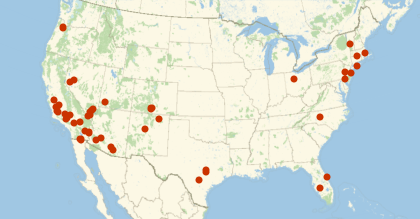

In [ ]:
GeoListPlot["pos" /. SolarFarmData]